## Geometric Brownian Motion (GBM)

We model the stock price process \( S_t \) using **Geometric Brownian Motion (GBM)**, defined by the stochastic differential equation

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t,
$$

where:
- $\,\mu\,$ is the **drift** (expected return),
- $\,\sigma\,$ is the **volatility**,
- $\,W_t\,$ is a standard **Brownian motion**.

---

### Discrete-Time GBM Solution

The exact discrete-time solution of GBM over a time step \( \Delta t \) is given by

$$
S_{t+\Delta t}
=
S_t \exp\!\left(
\left(\mu - \frac{1}{2}\sigma^2\right)\Delta t
+ \sigma \sqrt{\Delta t}\, Z_t
\right),
\quad Z_t \sim \mathcal{N}(0,1).
$$

---

### Parameters Used in the Simulation

$$
\begin{aligned}
S_0 &= 100 && \text{(initial stock price)} \\
\mu &= 0.09 && \text{(annual drift)} \\
\sigma &= 0.20 && \text{(annual volatility)} \\
\Delta t &= \frac{1}{252} && \text{(daily time step)} \\
N &= 252 && \text{(number of time steps)}
\end{aligned}
$$

A single GBM price path is simulated over one year using these parameters.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

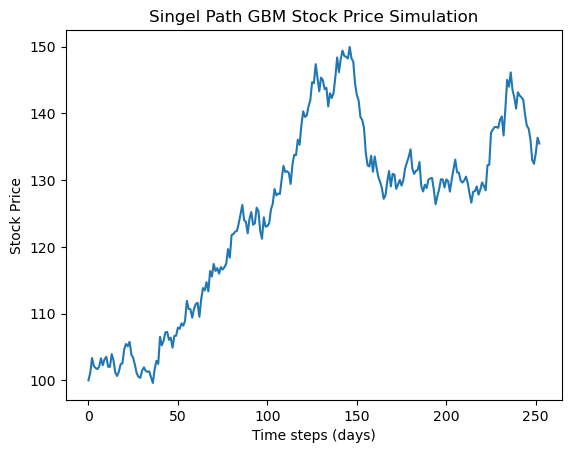

In [25]:
n = 252 # number of simulations
Z = np.random.normal(0, 1, n) # random number from standard normal distribution

# Inputs
S_0 = 100
sigma = 0.2
U = 0.09
t = 1/n

S = np.zeros(n + 1)
S[0] = S_0

for i in range(n):
    S[i+1] = S[i] * math.exp((U - (sigma**2 / 2)) * t + sigma * Z[i] * math.sqrt(t))

plt.plot(S)
plt.xlabel("Time steps (days)")
plt.ylabel("Stock Price")
plt.title("Singel Path GBM Stock Price Simulation")
plt.show();

### Simulating multiple GBM paths

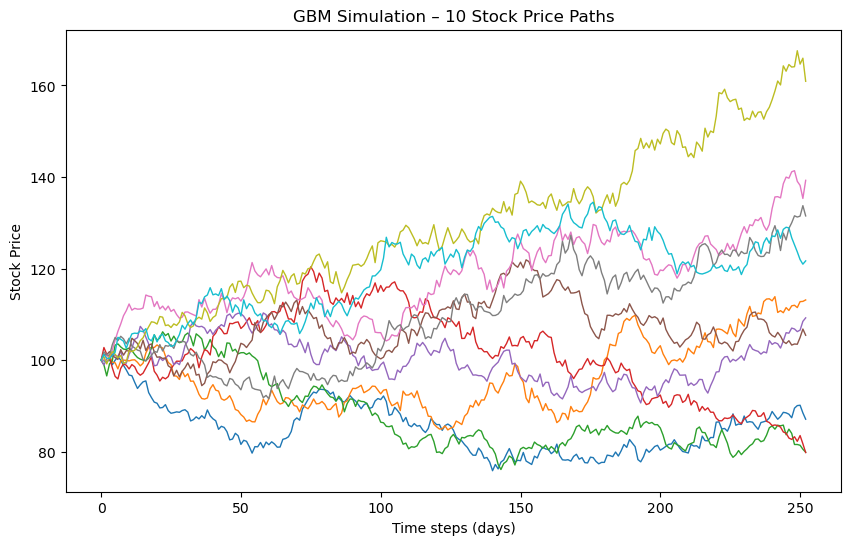

In [26]:
S0 = 100        # initial stock price
mu = 0.09       # annual drift
sigma = 0.2     # annual volatility
T = 1           # 1 year
n_steps = 252   # daily steps
n_paths = 10    # number of paths to simulate
dt = T / n_steps

# Generate standard normal random shocks
Z = np.random.normal(0, 1, (n_steps, n_paths))

# Initialize the array to store paths
S = np.zeros((n_steps + 1, n_paths))
S[0] = S0

# Simulate each path
for t in range(1, n_steps + 1):
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])

# Plot multiple paths
plt.figure(figsize=(10,6))
plt.plot(S, linewidth=1)
plt.xlabel("Time steps (days)")
plt.ylabel("Stock Price")
plt.title(f"GBM Simulation – {n_paths} Stock Price Paths")
plt.show();

## GBM: Simulation vs Theoretical Values

We can compare the **simulated stock prices** after 1 year with the **theoretical expectations and variances** from the GBM model.

---

### Theoretical Formulas for GBM

For a stock price  $\,S_0 \,$ at time  $\,T \,$ following Geometric Brownian Motion:

$$
\mathbb{E}[S_T] = S_0 \, e^{\mu T}
$$

$$
\text{Var}[S_T] = S_0^2 \, e^{2 \mu T} \left(e^{\sigma^2 T} - 1\right)
$$

where:

- $\,S_0 \,$ = initial stock price  
- $\,\mu\,$ = drift (expected return)  
- $\,\sigma\,$ = volatility  
-  $\,T \,$ = time horizon  

---

### Simulation Approach

- Simulate **n_sims** independent GBM paths over 1 year.
- Calculate the **mean** and **variance** of the simulated end-of-year prices.
- Compare the simulated statistics to the theoretical formulas above.

---

This allows us to **verify the correctness of the GBM simulation** and see how closely the simulated prices follow the theoretical distribution.


Simulation mean: 109.32, Theoretical mean: 109.42
Simulation variance: 484.63, Theoretical variance: 488.59


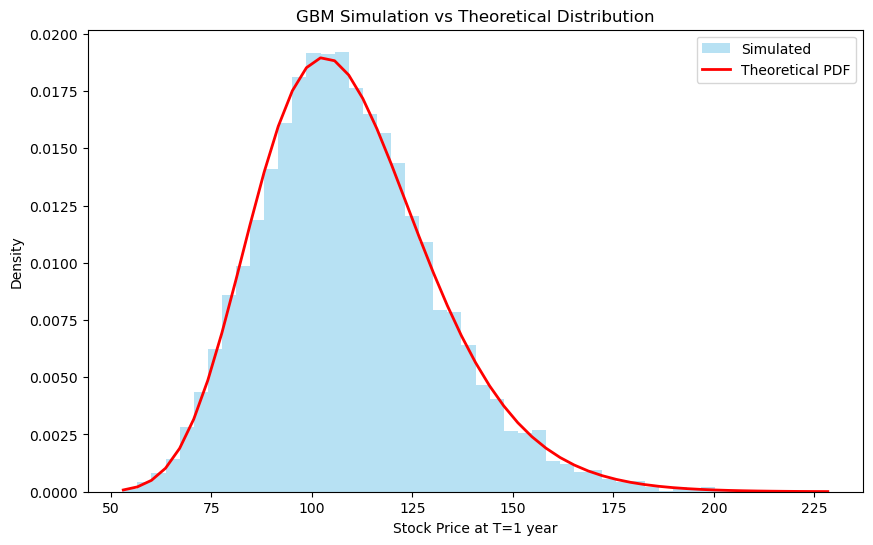

In [29]:
# Parameters
S0 = 100       # initial stock price
mu = 0.09      # annual drift
sigma = 0.2    # annual volatility
T = 1          # 1 year
n_steps = 252  # daily steps
n_sims = 10000 # number of simulations
dt = T / n_steps

# Generate standard normal shocks
Z = np.random.normal(0, 1, (n_steps, n_sims))

# Simulate GBM paths
S = np.zeros((n_steps + 1, n_sims))
S[0] = S0
for t in range(1, n_steps + 1):
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])

# Final prices
S_end = S[-1]

# Simulation statistics
sim_mean = np.mean(S_end)
sim_var = np.var(S_end)

# Theoretical GBM formulas
theo_mean = S0 * np.exp(mu * T)
theo_var = (S0**2) * np.exp(2 * mu * T) * (np.exp(sigma**2 * T) - 1)

print(f"Simulation mean: {sim_mean:.2f}, Theoretical mean: {theo_mean:.2f}")
print(f"Simulation variance: {sim_var:.2f}, Theoretical variance: {theo_var:.2f}")

# Plot histogram and theoretical PDF
plt.figure(figsize=(10,6))
count, bins, _ = plt.hist(S_end, bins=50, density=True, alpha=0.6, color='skyblue', label='Simulated')

# Theoretical lognormal PDF
shape = sigma * np.sqrt(T)                # shape parameter for lognorm
scale = S0 * np.exp((mu - 0.5 * sigma**2) * T)  # scale parameter
pdf = lognorm.pdf(bins, s=shape, scale=scale)
plt.plot(bins, pdf, 'r', lw=2, label='Theoretical PDF')

plt.xlabel('Stock Price at T=1 year')
plt.ylabel('Density')
plt.title('GBM Simulation vs Theoretical Distribution')
plt.legend()
plt.show()
